# Backtest a  Strategy

In [9]:
%matplotlib inline
from smartbots.stats import return_series
# extend pandas functionality with metrics, etc.
from smartbots.crypto.historical_downloader import historical_downloader, save_test_data
import datetime as dt
import pandas as pd
from smartbots.engine.data_reader import read_data_to_dataframe
from smartbots.engine.portfolio_constructor import Portfolio_Constructor

## Parameters configuration

In [19]:
interval = '1h'  # 1m , 5m, 30m, 1h
provider = 'kucoin'  # test , binance, coinbase ...
fresh_start = True # if you want to download the symbols again
download_data = False # True for downloading
symbols = ["BTC-USDT","ETH-USDT"] # List of symbols to download from provider
benchmark = "BTC-USDT"
start_date = dt.datetime(2018,1,1) # Start date of data to download
end_date = dt.datetime.utcnow() # End date of data to download

# Portfolio construction
inicial_cash = 50000 # initial capital for the portfolio



## 1) Download Historical Data from Data Provider and save into the database.
Please see here the docs of the exchanges available: https://github.com/ccxt/ccxt/wiki/Manual#markets


If you already have the data in a database, you can skip this step and go to the next.

Dependings of the symbols and the length of the data, the data loader will take some time to complete. Be pacience.

If there are already some data in the database, it will update only the new data.


In [3]:
if download_data:
    if provider == 'test': # test data
        save_test_data()
    else:
        start_date = dt.datetime(2018,1,1) # Start date of data to download
        end_date = dt.datetime.utcnow() # End date of data to download
        clean_symbols_database = []
        if fresh_start:
            clean_symbols_database = symbols
         # Interval of data to download,
        historical_downloader(symbols=symbols,start_date=start_date, end_date=dt.datetime.utcnow(),
               provider=provider,clean_symbols_database=clean_symbols_database,interval=interval)

## 2) Read Historical Data from Database and Visualize it.


In [20]:

df1 = read_data_to_dataframe(symbols[0], provider,start_date=start_date,end_date=end_date, interval=interval)
df2 = read_data_to_dataframe(symbols[-1], provider,start_date=start_date,end_date=end_date,interval=interval)

df = pd.concat([df1,df2],axis=0)

<AxesSubplot:xlabel='date'>

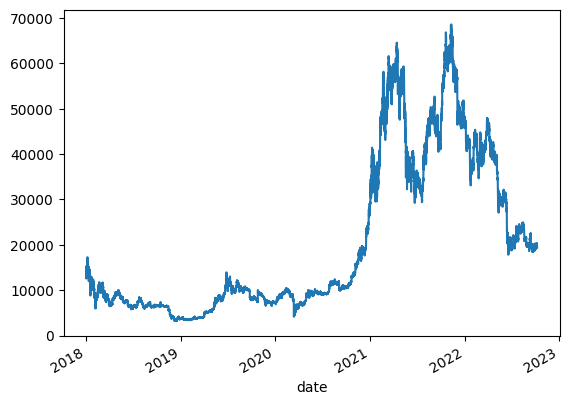

In [5]:
df1.close.plot()

## 3) BackTesting

### Settings

In [6]:

start_date = dt.datetime(2018,1,1) # Start date for backtesting


strategy1 = {'id': 1, # unique id for strategy to run
             'strategy': 'Simple_Avg_Cross', # strategy name, create in smartbots/crypto/strategies
             'params': {'ticker': 'BTC-USDT',
             'short_period': 10,
             'long_period': 500,
             'quantity': 1,
             'limit_save_values':1000,'point_value':1,'slippage':0}}

strategy2 = {'id': 2, # unique id for strategy to run
             'strategy': 'Simple_Avg_Cross', # strategy name, create in smartbots/crypto/strategies
             'params': {'ticker': 'ETH-USDT',
             'short_period': 10,
             'long_period': 500,
             'quantity': 1,
             'limit_save_values':1000,'point_value':1,'slippage':0}}



conf_portfolio = {'Name': 'PortfolioCrypto1',
                  'Data_Sources': 
                  [{'tickers': ['BTC-USDT','ETH-USDT'],
                   'event_type': 'bar',
                   'historical_source': 'mongoDB',
                   'historical_library': f'{provider}_historical_{interval}'}],
                   'Strategies': 
                    [strategy1, strategy2]}

In [7]:
portfolio = Portfolio_Constructor(conf_portfolio, run_real=False, asset_type='crypto',
                                             send_orders_to_broker=False, start_date=start_date,
                                  inicial_cash=inicial_cash)
portfolio.run_simulation() # backtest 

info_port = portfolio.get_saved_values_strategy() # read change of positions

Loading BTC-USDT from 2018-01-01 00:00:00
Loading ETH-USDT from 2018-01-01 00:00:00
Loading BTC-USDT from 2018-02-01 00:00:00
Loading ETH-USDT from 2018-02-01 00:00:00
Loading BTC-USDT from 2018-03-01 00:00:00
Loading ETH-USDT from 2018-03-01 00:00:00
Loading BTC-USDT from 2018-04-01 00:00:00
Loading ETH-USDT from 2018-04-01 00:00:00
Loading BTC-USDT from 2018-05-01 00:00:00
Loading ETH-USDT from 2018-05-01 00:00:00
Loading BTC-USDT from 2018-06-01 00:00:00
Loading ETH-USDT from 2018-06-01 00:00:00
Loading BTC-USDT from 2018-07-01 00:00:00
Loading ETH-USDT from 2018-07-01 00:00:00
Loading BTC-USDT from 2018-08-01 00:00:00
Loading ETH-USDT from 2018-08-01 00:00:00
Loading BTC-USDT from 2018-09-01 00:00:00
Loading ETH-USDT from 2018-09-01 00:00:00
Loading BTC-USDT from 2018-10-01 00:00:00
Loading ETH-USDT from 2018-10-01 00:00:00
Loading BTC-USDT from 2018-11-01 00:00:00
Loading ETH-USDT from 2018-11-01 00:00:00
Loading BTC-USDT from 2018-12-01 00:00:00
Loading ETH-USDT from 2018-12-01 0

## Statistics

Plots and statistics of the Strategies and the Portfolio.

<AxesSubplot:xlabel='datetime'>

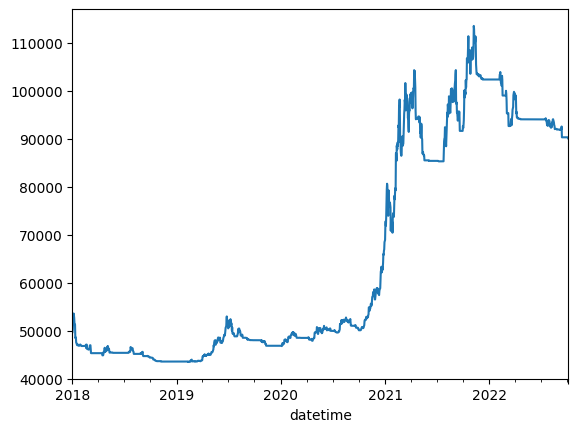

In [17]:
equities =portfolio.equity_handler.get_equities()
equity_portfolio = equities['equity_portfolio']['equity']
metrics =return_series.from_nav(equity_portfolio)
equity_portfolio.plot()

In [16]:
metrics.summary()

Performance number
Return                                       81.1764
# Events                                        1740
# Events per year                                365
Annua Return                                 12.4688
Annua Volatility                             17.5847
Annua Sharpe Ratio (r_f = 0)                0.709071
Max Drawdown                                  20.694
Max % return                                 9.71919
Min % return                                -6.44544
MTD                                         -0.30147
YTD                                         -12.0393
Current Nav                                  90051.9
Max Nav                                       113550
Current Drawdown                              20.694
Calmar Ratio (3Y)                            1.01131
# Positive Events                               1233
# Negative Events                                507
Value at Risk (alpha = 95)                   1.19234
Conditional Value at Risk (